<a href="https://colab.research.google.com/github/PrathameshBagal/Projects/blob/main/cse519_hw3_Bagal_Prathamesh_115612879.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### TOC
1. Anomalies in Data, and cleaning action & explaination. 15 pts
2. Pairwise Corralation Table and explaition. 10 pts
3. Average records stockID vs Day, 25 pts
    - a. autocorrelation, 10 pts
    - b. measure the distance, 5 pts
    - c. clustering algorithm, 10 pts
4. Closing trajectory of stocks on each day highly correlated, 25 pts
   - a. Make three plots, 10 pts
   - b. permutation test to determine the statistical confidence, 15 pts
      p-value
5. Best prediction model, any approaches, 25 pts
6. submit model on Kaggle, 0 pts

#### Start
- Copy this notebook.
  In Google Colab use `File -> Save a Copy in Drive`.
- Use the "Text" blocks to provide explanations wherever you find them necessary.
- Highlight your answers inside these text fields to ensure that we don't miss it
while grading your HW.

#### Setup

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and
uploading it to your drive), you can skip this section.

In [2]:
## First mount your drive before running analysis code
from google.colab import drive
drive.mount('/content/drive')

## Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519hw3


Mounted at /content/drive
/content/drive/MyDrive/cse519hw3


In [ ]:
## packages
!pip install -q kaggle
!pip install -q pandas
!pip install -q scikit-learn
!pip install -q numpy
!pip install -q Matplotlib
!pip install -q seaborn


In [ ]:
## Upload the file by clicking on the browse
from google.colab import files
files.upload()

## Create a new API token under "Account" in the kaggle webpage and download the json file

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"prathameshbagal2908","key":"aeb262bba67aa035274dbdbeb018df79"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c optiver-trading-at-the-close
!unzip optiver-trading-at-the-close.zip
!ls

optiver-trading-at-the-close.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  optiver-trading-at-the-close.zip
replace example_test_files/revealed_targets.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:  example_test_files   kaggle.json			 public_timeseries_testing_util.py
'kaggle (1).json'     optiver2023			 train.csv
'kaggle (2).json'     optiver-trading-at-the-close.zip


#### Q1: Anomalies and Cleaning, 15 pts


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

col_names = [
  "stock_id",
  "date_id",
  "seconds_in_bucket",
  "imbalance_size",
  "imbalance_buy_sell_flag",
  "reference_price",
  "matched_size",
  "far_price",
  "near_price",
  "bid_price",
  "bid_size",
  "ask_price",
  "ask_size",
  "wap",
  "target",
  "time_id",
  "row_id"
]
dtypes = {
  "stock_id": int,
  "date_id":int,
  "seconds_in_bucket":int,
  "imbalance_size":np.float64,
  "imbalance_buy_sell_flag":int,
  "reference_price":np.float64,
  "matched_size":np.float64,
  "far_price":np.float64,
  "near_price":np.float64,
  "bid_price":np.float64,
  "bid_size":np.float64,
  "ask_price":np.float64,
  "ask_size":np.float64,
  "wap":np.float64,
  "target":np.float64,
  "time_id":int,
  "row_id": "string",
}
csv = pd.read_csv("train.csv")


In [4]:
csv

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [5]:
df = csv.copy()

In [6]:
#  Calculating the number of missing values
df.isna().sum().sort_values(ascending=False)

far_price                  2894342
near_price                 2857180
ask_price                      220
imbalance_size                 220
reference_price                220
matched_size                   220
wap                            220
bid_price                      220
target                          88
time_id                          0
ask_size                         0
stock_id                         0
bid_size                         0
date_id                          0
imbalance_buy_sell_flag          0
seconds_in_bucket                0
row_id                           0
dtype: int64

*   As we can see, there are a lot of missing values in the dataset. We need to deal with them first before we start any preprocessing or modelling as a lot of functions will throw an error because of these missing values.

*   It is clear that there are 6 columns that have the equal number of missing values (220) . I have a feeling that they are all associated with the same rows, so I will remove them first.

*   I will deal with missing imbalance values for that.









In [7]:
miss_imbalance = df[df.imbalance_size.isna()]
print("The stock_id for missing values are :")
set(miss_imbalance["stock_id"])

The stock_id for missing values are :


{19, 101, 131, 158}

In [8]:
stock_id_19 = df[df.stock_id == 19]
stock_id_19[stock_id_19.imbalance_size.isna()].head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
4764999,19,438,0,NaN,-1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.00,NaN,NaN,24090,438_0_19
4765199,19,438,10,NaN,-1,NaN,NaN,NaN,NaN,NaN,993.4,NaN,3776.44,NaN,3.800392,24091,438_10_19
4765399,19,438,20,NaN,-1,NaN,NaN,NaN,NaN,NaN,993.4,NaN,3776.44,NaN,0.220537,24092,438_20_19
4765599,19,438,30,NaN,-1,NaN,NaN,NaN,NaN,NaN,15097.4,NaN,3974.80,NaN,-1.299977,24093,438_30_19
4765799,19,438,40,NaN,-1,NaN,NaN,NaN,NaN,NaN,15494.7,NaN,4173.54,NaN,-1.900196,24094,438_40_19




*   After checking for stock id 19, the output shows that certain rows have missing values for all columns. These are rows which will be useless to us a they have mostly NaN values in all their columns.
*   This is the reason I will be removing these rows.



In [9]:
df = df.dropna(subset=["imbalance_size"], axis=0)
df.isna().sum().sort_values(ascending=False)


far_price                  2894122
near_price                 2856960
bid_price                        0
time_id                          0
target                           0
wap                              0
ask_size                         0
ask_price                        0
bid_size                         0
stock_id                         0
date_id                          0
matched_size                     0
reference_price                  0
imbalance_buy_sell_flag          0
imbalance_size                   0
seconds_in_bucket                0
row_id                           0
dtype: int64

In [10]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198




*   As we can see we have removed the missing values for most columns by removing certain bad rows that accounted for most of the missing values.
*   One interesting thing is the huge number of missing values for far and near price.

*   The number of missing values in far and near price is unusually high. Seeing some missing values like we saw in imbalance_size and other columns is understandable. But 2.8 million missing values shows that there is a pattern and a reason for the unusually high number of missing values.








*   In this section I will deal with the far and near price columns and try and prepare the data by dealing with the Nan values in these 2 columns
*   Far and near prices are variables which are calculated throughout the auction at different intervals.


*   Given the 2.8 million missing values, I believe that the data might be missing for a part of the auction.
*   To verify that, I will try and find the seconds_in_bucket values where far and near prices are available.





In [11]:
# calculating seconds_in_bucket values where there are some valid far price values available.
df[~df.far_price.isna()].seconds_in_bucket.unique()

array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
       430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540])

In [12]:
# calculating seconds_in_bucket values where there are some valid near price values vailable.
df[~df.near_price.isna()].seconds_in_bucket.unique()

array([300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420,
       430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540])



*   The outputs show that the seconds_in_bucket values where non null far and near price values are available are >= 300.
*   I will now verify this by calculating the non null far and near price for all rows where seconds_in_bucket < 300.




In [13]:
df_before_300 = df.loc[df["seconds_in_bucket"] < 300]

print(f"Total rows where seconds_in_bucket < 300 are {len(df_before_300)}")
print(f"Total non null values per column where seconds_in_bucket < 300: \n{df_before_300.notna().sum()}")

Total rows where seconds_in_bucket < 300 are 2856960
Total non null values per column where seconds_in_bucket < 300: 
stock_id                   2856960
date_id                    2856960
seconds_in_bucket          2856960
imbalance_size             2856960
imbalance_buy_sell_flag    2856960
reference_price            2856960
matched_size               2856960
far_price                        0
near_price                       0
bid_price                  2856960
bid_size                   2856960
ask_price                  2856960
ask_size                   2856960
wap                        2856960
target                     2856960
time_id                    2856960
row_id                     2856960
dtype: int64


* As we can see, there are 0 non null far and near price values where seconds_in_bucket < 300.

*   This shows us that the dataset does not contain valid far_price and near_price values for the first 5 minutes of the auction.
* We can conclude that the far_price and near_price as useless for prediction in the first 5 minutes of the auction.




In [14]:
df_after_300 = df.loc[df["seconds_in_bucket"] >= 300 ]
print(f"The number of null values when seconds_in_bucket >= 300 \n{df_after_300.isna().sum()}")

The number of null values when seconds_in_bucket >= 300 
stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  37162
near_price                     0
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
target                         0
time_id                        0
row_id                         0
dtype: int64


* After this block we see that when seconds_in_bucket >= 300, the only column with null values is far_price.
* This means that almost half the rows in the dataset have a null value in the far_price column.
* This makes it tempting to delete the entire column altogether.
* After speaking with the instructors on piazza, I am leaning towards keeping the column and substituting the null values with the mean calculated from the non null values in the column.
* I will be doing the same for near_price values.

In [15]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [16]:
#  Calculating mean for far_price
non_null_far_price = df.loc[df["far_price"].isna()==False]
far_price_mean = non_null_far_price.far_price.mean()
far_price_mean

1.0017128691026518

In [17]:
#  Calculating mean for near_price
non_null_near_price = df.loc[df["near_price"].isna()==False]
near_price_mean = non_null_near_price.near_price.mean()
near_price_mean

0.99966010606813

In [18]:
# Substituting null values with mean values for far_price and near_price.
df_without_na = df.copy()
df_without_na.far_price.fillna(far_price_mean, inplace = True)
df_without_na.near_price.fillna(near_price_mean, inplace = True)
df_without_na.drop(columns="row_id",inplace=True)
df_without_na

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.001713,0.999660,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.001713,0.999660,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.001713,0.999660,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.001713,0.999660,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.001713,0.999660,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454


* As we can see, after substituting the null values for far and near price with their respective means, there are no null values in the entire dataset.

In [19]:
df_without_na.isna().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
dtype: int64

**Summary Q1**

* First thing I did was calculate the number of null values per column in the entire dataset.
* This was interesting as there were 6 columns with an equal number (220) of null values in them.
* This equal number gave me a feeling that all these null values were due to certain rows missing values for all the columns.
* My intuition turned out to be true. After removing such rows, the number of null values for all but 2 columns was 0.
* Those 2 columns were far_price and near_price.
* They both had 2.8 million null values each. That was almost half the dataset.
* This massive number indicated that there was some pattern. On further analysis, I discovered that all rows in the first 5 minutes of the auction had null values for far_price and near_price.
* After the first 5 mins,the only column with null values was far_price.
* I considered removing the column, but there was a chance that for the last 5 mins maybe the column indicated some pattern.
* This is why I decided to substitute the null values in far_price and near_price with their respective mean_values so we do not lose their potential insights for the last 5 mins of the auction.

#### Q2: Pairwise Corralation Table and Explaition. 10 pts


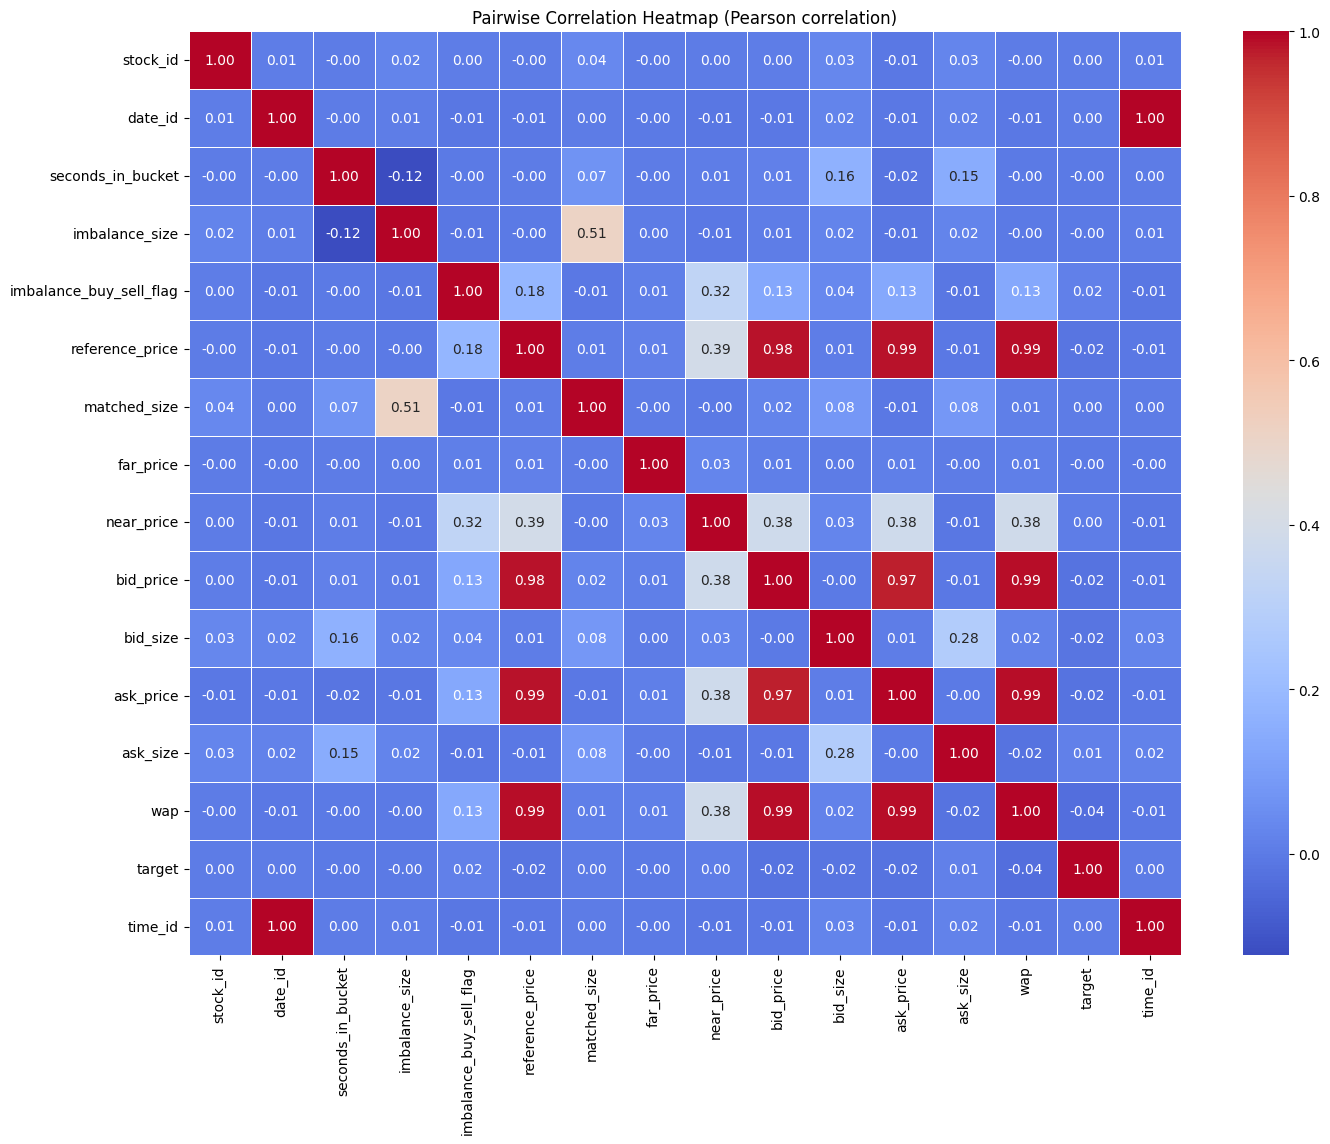

In [20]:
pairwise_correlation = df_without_na.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(pairwise_correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap (Pearson correlation)')
plt.show()

**There are certain variables that have extremely high correlation with each other.They are:**


1.   date_id and time_id: These columns have perfect correlation(1). This is pretty obvious because they both indicate the exact same thing (time) but in different formats.
2.   bid_price and reference_price: Bid price is the most competitive buy price in the non auction book (the highest buy offer <= reference price). Since it is the closest values to the reference price on the buy side, the almost perfect correlation (0.98) makes sense.
3. ask_price and reference_price: Ask price is the most competitive (closest) sell order that is >= reference price. Hence the correlation of 0.99 is logical as these values are seperated by very small amounts.
4. bid_price and ask_price: These are the closest buy/sell orders on either side of the reference price and are hence extremely similar to each other. This is why their correlation(0.97) which is less than their individual correlation with reference_price would be justifiable because they are on the either side of reference_price and hence their gap would be bigger than their individual gaps to reference_price.
5. wap and ask_price/bid_price: From the google doc description of the data, we know that wap is calculated using the bid_price, ask_price and bid/ask size. wap has almost 0 correlation to the sizes, hence it makes total sense that it has almost perfect correlation(0.99) with both bid_price and ask_price.


 **There are some other correlations that are noteworthy.**
* These cannot be classified as high correlations but looked interesting to me hence I will talk about them.
1. matched_size and imbalance_size: According to the description in the hw 3 doc:
  * imbalance_size: The amount unmatched at the current reference price (in USD) and
  * matched_size: The amount that can be matched at the current reference price (in USD).
  * These two by definition are completely opposite to each other but have a correlation of 0.51. I expected them to have a negative correlation.
  * This is why I feel this was a noteworthy observation.
2. near_price and (wap,bid_price,ask_price,imbalance_buy_sell_flag): near_price has somewhat weak to moderate correlation with these values.  
 * All these values are very close to 1 and this could be the reason they have some correlation.
 * But then it occured to me that even far_price is always close to 1 but does not have any correlation with any of these values.
 * This is why I feel that the near_price variable is an interesting one.

3. One thing that I noted was that target had no correlation with any of the variables which is slightly concerning as that is what we are trying to predict by using all these other variables.

#### Q3: Average records stockID vs Day, 25 pts
distance function between entries
- a. autocorrelation, 10 pts
- b. measure the distance, 5 pts
- c. clustering algorithm, 10 pts



In [21]:
final_df = df_without_na.copy()
final_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.001713,0.999660,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.001713,0.999660,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.001713,0.999660,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.001713,0.999660,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.001713,0.999660,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454


In [22]:
average_records = df.groupby(['stock_id',"date_id"]).mean()
# average_records.loc[average_records['date_id']<=1]
average_records


<ipython-input-22-28142f37e6ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_records = df.groupby(['stock_id',"date_id"]).mean()


seconds_in_bucket  imbalance_size  imbalance_buy_sell_flag  \
stock_id date_id                                                               
0        0                    270.0    1.229794e+06                 0.709091   
         1                    270.0    1.175555e+06                 1.000000   
         2                    270.0    1.593084e+04                 0.036364   
         3                    270.0    5.396968e+06                -1.000000   
         4                    270.0    4.132774e+06                -1.000000   
...                             ...             ...                      ...   
199      476                  270.0    2.294683e+06                 0.781818   
         477                  270.0    3.827352e+06                -0.981818   
         478                  270.0    1.095057e+06                 0.872727   
         479                  270.0    2.343566e+06                 0.145455   
         480                  270.0    4.367425e+06                -0.636364   

                  reference_price  matched_size  far_price  near_price  \
stock_id date_id                                                         
0        0               0.999664  2.064913e+07   0.999692    0.999615   
         1               0.999050  9.342939e+06   1.009668    1.003035   
         2               0.998940  1.306975e+07   0.998583    0.998583   
         3               0.998883  1.414532e+07   0.977043    0.938763   
         4               1.000689  1.882983e+07   0.985712    0.986791   
...                           ...           ...        ...         ...   
199      476             1.000570  2.089265e+07   1.013641    1.004754   
         477             0.997992  1.337857e+07   0.965812    0.976969   
         478             1.000950  1.080398e+07   1.012397    1.004992   
         479             1.002252  2.773323e+07   1.035374    1.022566   
         480             1.001367  1.582548e+07   1.001367    1.001583   

                  bid_price       bid_size  ask_price       ask_size  \
stock_id date_id                                                       
0        0         0.999547   36503.148364   0.999697   34108.372182   
         1         0.998903   39277.045455   0.999091   25393.018909   
         2         0.998895   34400.522909   0.999039   37903.561091   
         3         0.998834   45016.867818   0.999015   75358.912364   
         4         1.000637   31768.836727   1.000925   56905.171818   
...                     ...            ...        ...            ...   
199      476       1.000291   83208.703818   1.000614   93354.227818   
         477       0.997940   62637.859818   0.998261   62630.512364   
         478       1.000662   75990.765818   1.000982   67328.337273   
         479       1.002079   91019.942000   1.002402   50871.530364   
         480       1.001338  144654.755818   1.001656  112762.044000   

                       wap    target  time_id  
stock_id date_id                               
0        0        0.999618 -0.734535     27.0  
         1        0.999000  0.328942     82.0  
         2        0.998962 -0.326709    137.0  
         3        0.998919 -3.225099    192.0  
         4        1.000755 -1.614007    247.0  
...                    ...       ...      ...  
199      476      1.000444  0.966506  26207.0  
         477      0.998099 -4.226023  26262.0  
         478      1.000838  1.323126  26317.0  
         479      1.002288  3.300006  26372.0  
         480      1.001525  2.684723  26427.0  

[95232 rows x 14 columns]

In [23]:
from itertools import product
from scipy.spatial.distance import euclidean, cdist


In [24]:
unique_pairs = list(product(df["date_id"].unique(),df["stock_id"].unique()))
(unique_pairs[:10])

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9)]

In [25]:
average_records = df.groupby(['stock_id', 'date_id'])['imbalance_size', 'imbalance_buy_sell_flag',
       'reference_price', 'matched_size','target'].mean().reset_index()
# average_records["imbalance_amount"] = df["imbalance_size"]*df["imbalance_buy_sell_flag"]
average_records.drop(columns=["imbalance_size","imbalance_buy_sell_flag","matched_size"],inplace=True)
average_records

<ipython-input-25-d58b8e6da5f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_records = df.groupby(['stock_id', 'date_id'])['imbalance_size', 'imbalance_buy_sell_flag',


,stock_id,date_id,reference_price,target
0,0,0,0.999664,-0.734535
1,0,1,0.999050,0.328942
2,0,2,0.998940,-0.326709
3,0,3,0.998883,-3.225099
4,0,4,1.000689,-1.614007
...,...,...,...,...
95227,199,476,1.000570,0.966506
95228,199,477,0.997992,-4.226023
95229,199,478,1.000950,1.323126
95230,199,479,1.002252,3.300006


In [26]:
average_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95232 entries, 0 to 95231
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stock_id         95232 non-null  int64  
 1   date_id          95232 non-null  int64  
 2   reference_price  95232 non-null  float64
 3   target           95232 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 2.9 MB


In [27]:
grouped_data = average_records.copy()
# These 4 dropped values are used to calculate wap and have high correlation.
# grouped_data.drop(columns=["bid_size","ask_size","bid_price","ask_price"],inplace=True)
# grouped_data["imbalance_amount"]= grouped_data["imbalance_size"]*grouped_data["imbalance_buy_sell_flag"]
# grouped_data.drop(columns=["imbalance_buy_sell_flag","imbalance_size"],inplace=True)
grouped_data

,stock_id,date_id,reference_price,target
0,0,0,0.999664,-0.734535
1,0,1,0.999050,0.328942
2,0,2,0.998940,-0.326709
3,0,3,0.998883,-3.225099
4,0,4,1.000689,-1.614007
...,...,...,...,...
95227,199,476,1.000570,0.966506
95228,199,477,0.997992,-4.226023
95229,199,478,1.000950,1.323126
95230,199,479,1.002252,3.300006


In [82]:
columns_to_include = ["reference_price"] #"wap",
scaled_grouped_data = grouped_data[columns_to_include].copy()
# scaled_grouped_data["reference_price"] = scaled_grouped_data["reference_price"]*grouped_data["matched_size"]
scaled_grouped_data = (scaled_grouped_data - scaled_grouped_data.mean())/scaled_grouped_data.std()
scaled_grouped_data["stock_id"] = grouped_data["stock_id"]
scaled_grouped_data["date_id"]= grouped_data["date_id"]
# scaled_grouped_data.drop(columns = ["imbalance_amount"] , inplace = True)
# scaled_grouped_data["average_per_stock_per_day"] = scaled_grouped_data.mean(axis=1)
# consensus_stock_data = scaled_grouped_data[["stock_id","date_id","average_per_stock_per_day"]]
# consensus_stock_data
scaled_grouped_data

,reference_price,stock_id,date_id
0,-0.156612,0,0
1,-0.446566,0,1
2,-0.498468,0,2
3,-0.525248,0,3
4,0.327572,0,4
...,...,...,...
95227,0.271111,199,476
95228,-0.945999,199,477
95229,0.450780,199,478
95230,1.065539,199,479


In [29]:
consensus_stock_data

,stock_id,date_id,average_per_stock_per_day
0,0,0,-0.101213
1,0,1,0.172375
2,0,2,0.350167
3,0,3,0.331625
4,0,4,0.940379
...,...,...,...
95227,199,476,168.909393
95228,199,477,168.386011
95229,199,478,169.486528
95230,199,479,170.068814


In [91]:
import pandas as pd

# Assuming df is your DataFrame with 'stock_id', 'date_id', and 'average_price'

# Get unique stock_ids
unique_stock_ids = scaled_grouped_data['stock_id'].unique()

# Specify the range of lags for which you want to calculate autocorrelation
lags = range(-10, 11)  # Lag from -10 to +10

# Create a dictionary to store autocorrelation values for each stock
autocorrelation_dict = {}

# Iterate through each unique stock_id and calculate autocorrelation
for stock_id in unique_stock_ids:
    target_stock_df = scaled_grouped_data[scaled_grouped_data['stock_id'] == stock_id]
    autocorrelation_values = [target_stock_df['reference_price'].autocorr(lag=lag) for lag in lags]
    autocorrelation_dict[stock_id] = autocorrelation_values

# Create a DataFrame from the autocorrelation dictionary
autocorrelation_df = pd.DataFrame(autocorrelation_dict)
autocorrelation_df['Lag'] = lags

# Set the 'Lag' column as the index for better representation
autocorrelation_df.set_index('Lag', inplace=True)

In [89]:
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

# Load your DataFrame with autocorrelation values (assuming it's in 'autocorr_df')
# ...

# Set the significance level (alpha)
alpha = 0.05

# Initialize an empty DataFrame to store results
significant_autocorrelation = pd.DataFrame(columns=['stock_id', 'lag', 'p-value'])

# Loop through each stock
for stock_id in autocorr_df['stock_id'].unique():
    stock_data = autocorrelation_df[autocorr_df['stock_id'] == stock_id]

    # Loop through lags in the range -10 to 11
    for lag in range(-10, 12):
        # Perform the Ljung-Box test
        result = acorr_ljungbox(stock_data[f'lag_{lag}'], lags=1)  # Set 'lags' to 1 for one-lag test

        # Extract the p-value from the test result
        p_value = result[1][0]

        # Check if the p-value is below the significance level (after correction)
        if p_value < alpha:
            significant_autocorrelation = significant_autocorrelation.append({
                'stock_id': stock_id,
                'lag': lag,
                'p-value': p_value
            }, ignore_index=True)

# Apply a multiple comparison correction (e.g., Bonferroni correction)

# Print or analyze the stocks with statistically significant autocorrelation
print(significant_autocorrelation)


NameError: ignored

In [32]:
import pandas as pd

# Assuming df is your DataFrame with 'stock_id', 'date_id', and the features

# Specify the features for which you want to calculate autocorrelation
features = ['reference_price', 'target']  # Replace with your actual feature names

# Specify the range of lags for which you want to calculate autocorrelation
lags = range(-10, 11)  # Lag from -10 to +10

# Define a function to calculate autocorrelation for a given series and lag
def autocorr(series, lag):
    return series.autocorr(lag)

# Calculate autocorrelation for each feature and each stock over the specified lag range
autocorrelation_dfs = {}
for feature in features:
    autocorrelation_df = average_records.groupby('stock_id')[feature].apply(
        lambda x: [autocorr(x, lag) for lag in lags]
    ).apply(pd.Series)

    # Set the column names to represent the lags
    autocorrelation_df.columns = ['{}_Lag_{}'.format(feature, lag) for lag in lags]

    autocorrelation_dfs[feature] = autocorrelation_df

# Merge the autocorrelation results for each feature based on the 'stock_id'
merged_autocorrelation_df = pd.concat(autocorrelation_dfs.values(), axis=1)
# merged_autocorrelation_df['Mean_Autocorrelation'] = merged_autocorrelation_df.mean(axis=1)
# Display the merged autocorrelation DataFrame
print("Merged Autocorrelation for each feature over the lag range:")
merged_autocorrelation_df["stock_id"] = [i for i in range(200)]

merged_autocorrelation_df

Merged Autocorrelation for each feature over the lag range:


,reference_price_Lag_-10,reference_price_Lag_-9,reference_price_Lag_-8,reference_price_Lag_-7,reference_price_Lag_-6,reference_price_Lag_-5,reference_price_Lag_-4,reference_price_Lag_-3,reference_price_Lag_-2,reference_price_Lag_-1,...,target_Lag_2,target_Lag_3,target_Lag_4,target_Lag_5,target_Lag_6,target_Lag_7,target_Lag_8,target_Lag_9,target_Lag_10,stock_id
stock_id,,,,,,,,,,,,,,,,,,,,,
0,-0.019645,-0.007052,0.022853,-0.005912,0.007958,-0.006626,0.011506,0.090911,-0.037557,0.035319,...,0.037131,-0.012857,-0.037702,-0.035685,-0.060683,-0.007004,-0.065433,0.034635,0.009581,0
1,0.020634,0.044069,0.019829,0.002007,-0.073984,0.022148,-0.065208,0.125355,0.044340,-0.063831,...,0.066186,0.018569,-0.072928,0.046261,-0.038555,0.058306,0.016849,0.059468,-0.025769,1
2,0.042928,-0.000749,0.022420,0.020802,-0.050468,-0.044181,-0.043604,-0.006825,0.147716,0.095471,...,0.043759,-0.003309,-0.026555,0.031693,0.046493,-0.000103,0.073487,-0.011529,-0.053680,2
3,-0.032773,0.039821,-0.027052,0.004634,0.004093,0.047380,-0.060653,0.025110,0.013149,0.069634,...,0.102887,0.135824,0.011812,0.178901,0.130741,0.044276,0.131153,-0.001691,-0.026151,3
4,-0.058097,0.063608,0.001005,-0.045555,0.013383,-0.024081,-0.045013,0.037967,0.096662,-0.010953,...,0.067701,-0.015033,-0.012275,-0.014923,-0.002123,-0.068099,0.036541,-0.080478,-0.029592,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.046232,0.042261,0.037613,0.048036,0.019079,0.026293,0.010295,0.064128,0.044823,0.084953,...,0.068370,-0.032100,-0.015268,-0.012721,0.011602,0.036099,-0.015653,0.033740,0.035971,195
196,-0.017774,-0.009421,-0.014564,-0.024516,0.017199,0.071280,0.029571,0.083707,0.098018,0.101812,...,0.088090,-0.039140,0.007681,-0.007143,0.003467,-0.051692,0.008309,-0.012123,0.005780,196
197,0.008265,-0.000847,-0.025226,0.082426,0.096098,0.039850,0.038387,-0.002606,-0.024550,0.011996,...,-0.016210,0.021345,0.016968,-0.023387,0.057202,0.028795,-0.019948,0.080205,0.034964,197


In [38]:
auto= pd.DataFrame()
features =["reference_price_Lag_","target_Lag_"] #imbalance_amount_Lag_"

mapp={}
# for stock_id in range(200):
for lag in lags:
  temp=[]
  for feature in features:
    temp.append((feature+str(lag)))

  mapp[lag]= temp
  # print(features[1]+str(lag))
mapp

{-10: ['reference_price_Lag_-10', 'target_Lag_-10'],
 -9: ['reference_price_Lag_-9', 'target_Lag_-9'],
 -8: ['reference_price_Lag_-8', 'target_Lag_-8'],
 -7: ['reference_price_Lag_-7', 'target_Lag_-7'],
 -6: ['reference_price_Lag_-6', 'target_Lag_-6'],
 -5: ['reference_price_Lag_-5', 'target_Lag_-5'],
 -4: ['reference_price_Lag_-4', 'target_Lag_-4'],
 -3: ['reference_price_Lag_-3', 'target_Lag_-3'],
 -2: ['reference_price_Lag_-2', 'target_Lag_-2'],
 -1: ['reference_price_Lag_-1', 'target_Lag_-1'],
 0: ['reference_price_Lag_0', 'target_Lag_0'],
 1: ['reference_price_Lag_1', 'target_Lag_1'],
 2: ['reference_price_Lag_2', 'target_Lag_2'],
 3: ['reference_price_Lag_3', 'target_Lag_3'],
 4: ['reference_price_Lag_4', 'target_Lag_4'],
 5: ['reference_price_Lag_5', 'target_Lag_5'],
 6: ['reference_price_Lag_6', 'target_Lag_6'],
 7: ['reference_price_Lag_7', 'target_Lag_7'],
 8: ['reference_price_Lag_8', 'target_Lag_8'],
 9: ['reference_price_Lag_9', 'target_Lag_9'],
 10: ['reference_price_Lag_

In [40]:
autocorr = []

In [39]:
merged_autocorrelation_df.loc[merged_autocorrelation_df["stock_id"]==0]

,reference_price_Lag_-10,reference_price_Lag_-9,reference_price_Lag_-8,reference_price_Lag_-7,reference_price_Lag_-6,reference_price_Lag_-5,reference_price_Lag_-4,reference_price_Lag_-3,reference_price_Lag_-2,reference_price_Lag_-1,...,target_Lag_2,target_Lag_3,target_Lag_4,target_Lag_5,target_Lag_6,target_Lag_7,target_Lag_8,target_Lag_9,target_Lag_10,stock_id
stock_id,,,,,,,,,,,,,,,,,,,,,
0,-0.019645,-0.007052,0.022853,-0.005912,0.007958,-0.006626,0.011506,0.090911,-0.037557,0.035319,...,0.037131,-0.012857,-0.037702,-0.035685,-0.060683,-0.007004,-0.065433,0.034635,0.009581,0


In [41]:
from collections import defaultdict
newMap=defaultdict(float)

In [43]:
for stock_id in range(200):
  row= merged_autocorrelation_df.loc[merged_autocorrelation_df["stock_id"]==stock_id]

  for lag, features in mapp.items():

    temp= (row[features[0]]+row[features[1]])/2
    newMap["lag"]= temp

newMap = pd.DataFrame(newMap)
newMap

,lag
stock_id,
199,0.027077


In [47]:
df_without_na.drop(columns=["time_id"],inplace=True)

In [50]:
import numpy as np

# Assume df contains the data for each stock on each day
# Calculate absolute differences for each pair of stocks on each day
pairwise_diff = np.abs(consensus_stock_data[:, np.newaxis] - df)

# Define a function to calculate Euclidean distance (or any other similarity metric)
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Calculate Euclidean distance for each pair of stocks on each day
euclidean_distances = np.apply_along_axis(euclidean_distance, axis=2, arr=pairwise_diff)

# Optionally, identify pairs that are unusually similar based on the distances
# You can set a threshold to define what is considered unusually similar
threshold = 0.1  # Adjust as needed
unusually_similar_pairs = np.argwhere(euclidean_distances < threshold)

# Print the unusually similar pairs
print("Unusually Similar Pairs:")
for pair in unusually_similar_pairs:
    print(f"Stocks {pair[0]} and {pair[1]} are unusually similar.")


InvalidIndexError: ignored

In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the data

# Step 1: Create the Average/Consensus Record for Each Stock

# Step 2: Normalize the Data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(consensus_stock_data)

# Step 3: Apply K-Means Clustering
num_clusters = 3  # Adjust based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

# Step 4: Determine the Optimal Number of Clusters (Optional)
# Use Elbow Method or Silhouette Score to determine the optimal number of clusters

# Step 5: Perform t-SNE Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)

# Step 6: Visualize the Clusters
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='viridis')
plt.colorbar(label='Cluster ID')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Plot of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: ignored

In [64]:
# selected_features = ['feature1', 'feature2', 'feature3']

# Step 2-3: Group data by stock and calculate aggregated values
consensus_df = consensus_stock_data.groupby('stock_id')["average_per_stock_per_day"].mean()
consensus_df = pd.DataFrame(consensus_df)
consensus_df

,average_per_stock_per_day
stock_id,
0,59.961730
1,60.235299
2,60.524703
3,60.739777
4,60.967898
...,...
195,108.721256
196,109.021510
197,109.272313


In [65]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(consensus_df)

# Step 3: Apply K-Means clustering
num_clusters = 4  # Determine the optimal number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
consensus_df['cluster_id'] = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

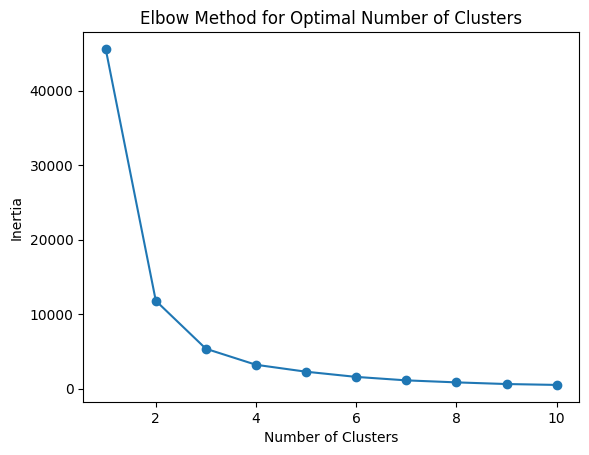

In [84]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []  # List to store inertias

for n_clusters in range(1, 11):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(consensus_df[['average_per_stock_per_day']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


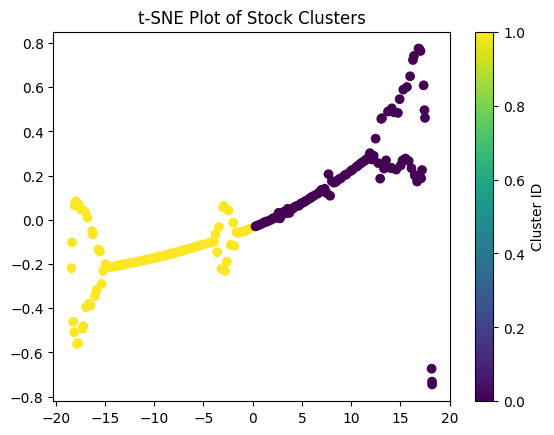

In [85]:
num_clusters = 2  # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
consensus_df['cluster_id'] = kmeans.fit_predict(consensus_df[['average_per_stock_per_day']])

# Step 4: Optionally, determine the number of clusters using the Elbow Method or Silhouette Score

# Step 6: Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(consensus_df[['average_per_stock_per_day', 'cluster_id']])

# Step 7: Plot the t-SNE results, color-coded by cluster ID
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=consensus_df['cluster_id'], cmap='viridis')
plt.title("t-SNE Plot of Stock Clusters")
plt.colorbar(label='Cluster ID')
plt.show()
# In this code, 'data_df' should contain the stock ID and the consensus feature. You can adjust the number of clusters and preprocessing steps based on your data and analysis. The t-SNE plot will visually represent how the stocks are clustered, and you can interpret the results to assess whether the clusters appear coherent or not.







#### Q4: Closing trajectory of stocks on each day highly correlated, 25 pts
- a. Make three plots, 10 pts
- b. permutation test for statistical confidence, p-value, 15 pts


#### Q5: Best prediction model, any approaches, 25 pts


In [ ]:
from sklearn.model_selection import KFold

from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection

regr = XGBRegressor()
after300 = df_without_na.copy()

after300 = after300.reset_index(drop = True)
X=after300.iloc[:,2:].drop(columns=["target",'row_id'])
y=after300['target']
mae_scores=[]
mae_rf=[]
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    # Fit the model on the training data
    regr.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regr.predict(X_test)

    # Calculate the mean absolute error for this fold
    mae = mean_absolute_error(y_test, y_pred)

    # Append the MAE score to the list of scores
    mae_scores.append(mae)
average_mae = np.mean(mae_scores)
print("Average Mean Absolute Error:", average_mae)
# df_test_x=df_test_x.rename(columns={"imbalance_buy_sell_flag_0": "imbalance_buy_sell_flag_0.0", "imbalance_buy_sell_flag_1": "imbalance_buy_sell_flag_1.0","imbalance_buy_sell_flag_-1":"imbalance_buy_sell_flag_-1.0"})
# pred=xgboost.predict(df_test_x)

#### Q6: submit model on Kaggle, 0 pts
Public Score: \
Private Score: \
Kaggle profile link: \
Screenshot(s): \
